## Project: Predicting Boston Housing Prices
### Data  

The modified Boston housing dataset consists of 489 data points, with each datapoint having 3 features. This dataset is a modified version of the Boston Housing dataset found on the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a> and you can find the main dataset on the 
<a href="https://www.kaggle.com/c/boston-housing">Kaggle</a>


### Features  

RM: average number of rooms per dwelling (Total number of rooms in home)  
LSTAT: percentage of population considered lower status (Neighborhood poverty level )  
PTRATIO: pupil-teacher ratio by town  (Student-teacher ratio of nearby schools)  
Target Variable: MEDV: median value of owner-occupied homes (house price)  

In [13]:
# Import libraries:
import numpy as np
import pandas as pd
%matplotlib inline

In [16]:
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


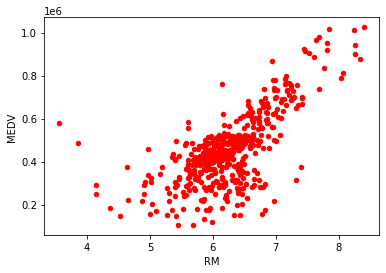

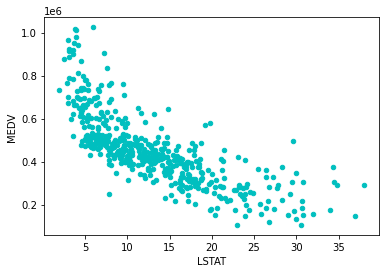

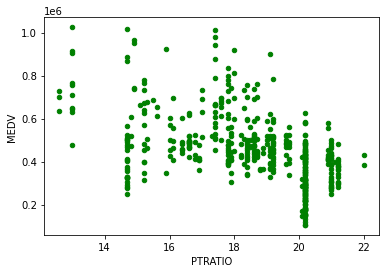

In [17]:
# Data Exploration
data.plot.scatter('RM','MEDV',c='r');
data.plot.scatter('LSTAT','MEDV',c='c');
data.plot.scatter('PTRATIO','MEDV',c='g');





In [18]:
#define variables(features,prices)
prices = data['MEDV']

features = data.drop('MEDV', axis = 1)
features.head(5)    

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [19]:
#split the data to two sets. training set and testing set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.25)

In [20]:
print("training set:",X_train.shape,y_train.shape)
print("testing set:",X_test.shape,y_test.shape[0])



training set: (366, 3) (366,)
testing set: (123, 3) 123


In [21]:
#create the rgression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [22]:
#fit/train the model:
model.fit(X_train,y_train);

In [23]:
#predict X_test by the model:
y_pred=model.predict(X_test)

In [24]:
#model accuracy test:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6615129681436184

In [25]:
#extra point: model accuracy train: to check underfitting and oferfitting
y_train_pre=model.predict(X_train)
r2_score(y_train, y_train_pre)

0.7291375566095728

## Extra:  
prdict the price for house with:   
Total number of rooms in home =7 rooms  
Neighborhood poverty level as 20%  
Student-teacher ratio of nearby schools=19-to-1  


In [28]:
np.array([7,20,19]).reshape(1,-1).shape

(1, 3)

In [29]:
model.predict(np.array([7,20,19]).reshape(1,-1))

array([436976.14948434])